# Decision Trees

### Concepts 
You're given a dataset of **30** elements, 15 of which belong to a positive class (denoted by `+` ) and 15 of which do not (denoted by `-`). These elements are described by two attributes, A and B, that can each have either one of two values, true or false. 

The diagrams below show the result of splitting the dataset by attribute: the diagram on the left hand side shows that if we split by attribute A there are 13 items of the positive class and 2 of the negative class in one branch and 2 of the positive and 13 of the negative in the other branch. The right hand side shows that if we split the data by attribute B there are 8 items of the positive class and 7 of the negative class in one branch and 7 of the positive and 8 of the negative in the other branch.

<img src="images/decision_stump.png">

### 1) Which one of the two attributes resulted in the best split of the original data? Best split is the one with the most pure nodes.

Assign `ans1` to either `"A"` or `"B"` to represent which attribute is best.

In [1]:
# CodeGrade step1
# Replace None with appropriate code
ans1 = "A"

In [2]:
# ans1 should be the string "A" or "B"
assert type(ans1) == str

### Decision Trees for Regression 

In this section, you will use decision trees to fit a regression model to the Combined Cycle Power Plant dataset. 

This dataset is from the UCI ML Dataset Repository, and has been included in the `data` folder of this repository as a csv `.csv` file, `Folds5x2_pp.csv`. 

The features of this dataset consist of hourly average ambient variables taken from various sensors located around a power plant that record the ambient variables every second.  
- Temperature (AT) 
- Ambient Pressure (AP) 
- Relative Humidity (RH)
- Exhaust Vacuum (V) 

The target to predict is the net hourly electrical energy output (PE). 

The features and target variables are not normalized.

In the cells below, we import `pandas` and `numpy` for you, and we load the data into a pandas DataFrame. We also include code to inspect the first five rows and get the shape of the DataFrame.

In [3]:
# Run this cell without changes

import pandas as pd 
import numpy as np 

# Load the data
filename = 'Folds5x2_pp.csv'
df = pd.read_csv(filename, index_col=0)

In [4]:
# Run this cell without changes
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
# Run this cell without changes
df.shape

(9568, 5)

Below, we split the data into features and target ('PE') for you. 

In [7]:
# Run this cell without changes
X = df[df.columns.difference(['PE'])]
y = df['PE']

### 2) Use `train_test_split` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) to split the data into training and test sets. Create training and test sets with `test_size=0.5` and `random_state=1`.

You will need to import the relevant code from scikit-learn

In [8]:
# CodeGrade step2
# Replace None with appropriate code

# Import the relevant function
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1)

In [9]:
# X_train and X_test should be dataframes
assert type(X_train) == pd.DataFrame and type(X_test) == pd.DataFrame

# y_train and y_test should be series
assert type(y_train) == pd.Series and type(y_test) == pd.Series

### 3) Fit a decision tree regression model with scikit-learn to the training data. Use parameter defaults and `random_state=1` for this model

For the rest of this section feel free to refer to the scikit-learn documentation on [decision tree regressors](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).
NOTE: This is the regression verison not the classifier.

You will need to import the relevant code from scikit-learn

Assign your regressor (model) to the variable `dt`

In [10]:
# CodeGrade step3
# Replace None with appropriate code

# Import the relevant class
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
dt = DecisionTreeRegressor(random_state=1)

# Fit the model to the training data here
dt.fit(X_train, y_train)

# Testing out the model's r2 score on the training data overall
dt_train_score = dt.score(X_train, y_train)
dt_train_score

1.0

In [11]:
# dt should be a decision tree regressor
assert type(dt) == DecisionTreeRegressor

### 4) That score looks good, but are we overfitting? Obtain the cross-validated coefficient of determination (r2 score) of the predictions of `dt` on the training data

You can use the default `cv` value of 5, and you do not need to specify a custom scorer, since r2 is the default for a `DecisionTreeRegressor`

You will need to import the relevant code from scikit-learn

[cross val score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

[cross validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

Assign your answer to the variable `dt_cv`

In [13]:
# CodeGrade step4
# Replace None with appropriate code

# Import the relevant function
from sklearn.model_selection import cross_val_score

# Assign the cross validated score to dt_cv
dt_cv = cross_val_score(dt, X_train, y_train)
dt_cv

array([0.90892482, 0.90764959, 0.92975025, 0.90521069, 0.91216957])

In [14]:
# dt_cv should be a NumPy array
assert type(dt_cv) == np.ndarray
# there should be 5 scores in dt_cv
assert len(dt_cv) == 5

In [23]:
from sklearn.tree import plot_tree

In [27]:
dt.get_depth()

29

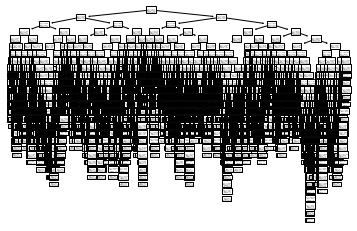

In [28]:
plot_tree(dt);

### Hyperparameter Tuning of Decision Trees for Regression

### 5) Create a second decision tree model, this time with the following hyperparameters specified:
 - `random_state=1`
 - `max_depth=5`

### Fit it to the training data

Assign the new model to the variable `dt_tuned`

In [15]:
# CodeGrade step5
# Replace None with appropriate code

# Create a second decision tree model
dt_tuned = DecisionTreeRegressor(random_state=1, max_depth=5)

# Fit the new model on the training data
dt_tuned.fit(X_train, y_train)

# Testing out the model's r2 score on the training data overall
dt_tuned_train_score = dt_tuned.score(X_train, y_train)
dt_tuned_train_score

0.9365685127196766

In [16]:
# dt_tuned sould be a DecisionTreeRegressor
assert type(dt_tuned) == DecisionTreeRegressor

### 6) Now the score on the training data overall is worse, but how does this generalize to unseen data? Obtain the cross-validated coefficient of determination (r2 score) of the predictions of `dt_tuned` on the training data

Use the same arguments as the previous cross validation

Assign your answer to the variable `dt_tuned_cv`

In [17]:
# CodeGrade step6
# Replace None with appropriate code
dt_tuned_cv = cross_val_score(dt_tuned, X_train, y_train)
dt_tuned_cv

array([0.93172053, 0.93093166, 0.93536142, 0.91836297, 0.92773155])

In [18]:
# dt_tuned_cv should be a NumPy array
assert type(dt_tuned_cv) == np.ndarray
# there should be 5 scores in dt_tuned_cv
assert len(dt_tuned_cv) == 5

In [19]:
# Run this cell without changes:
print("Train score for dt:      ", dt_train_score)
print("Train score for dt_tuned:", dt_tuned_train_score)
print()
print("CV scores for dt:      ", dt_cv.mean())
print("CV scores for dt_tuned:", dt_tuned_cv.mean())

Train score for dt:       1.0
Train score for dt_tuned: 0.9365685127196766

CV scores for dt:       0.912740985899376
CV scores for dt_tuned: 0.9288216268323287


In [29]:
dt_tuned.get_depth()

5

In [33]:
import matplotlib.pyplot as plt

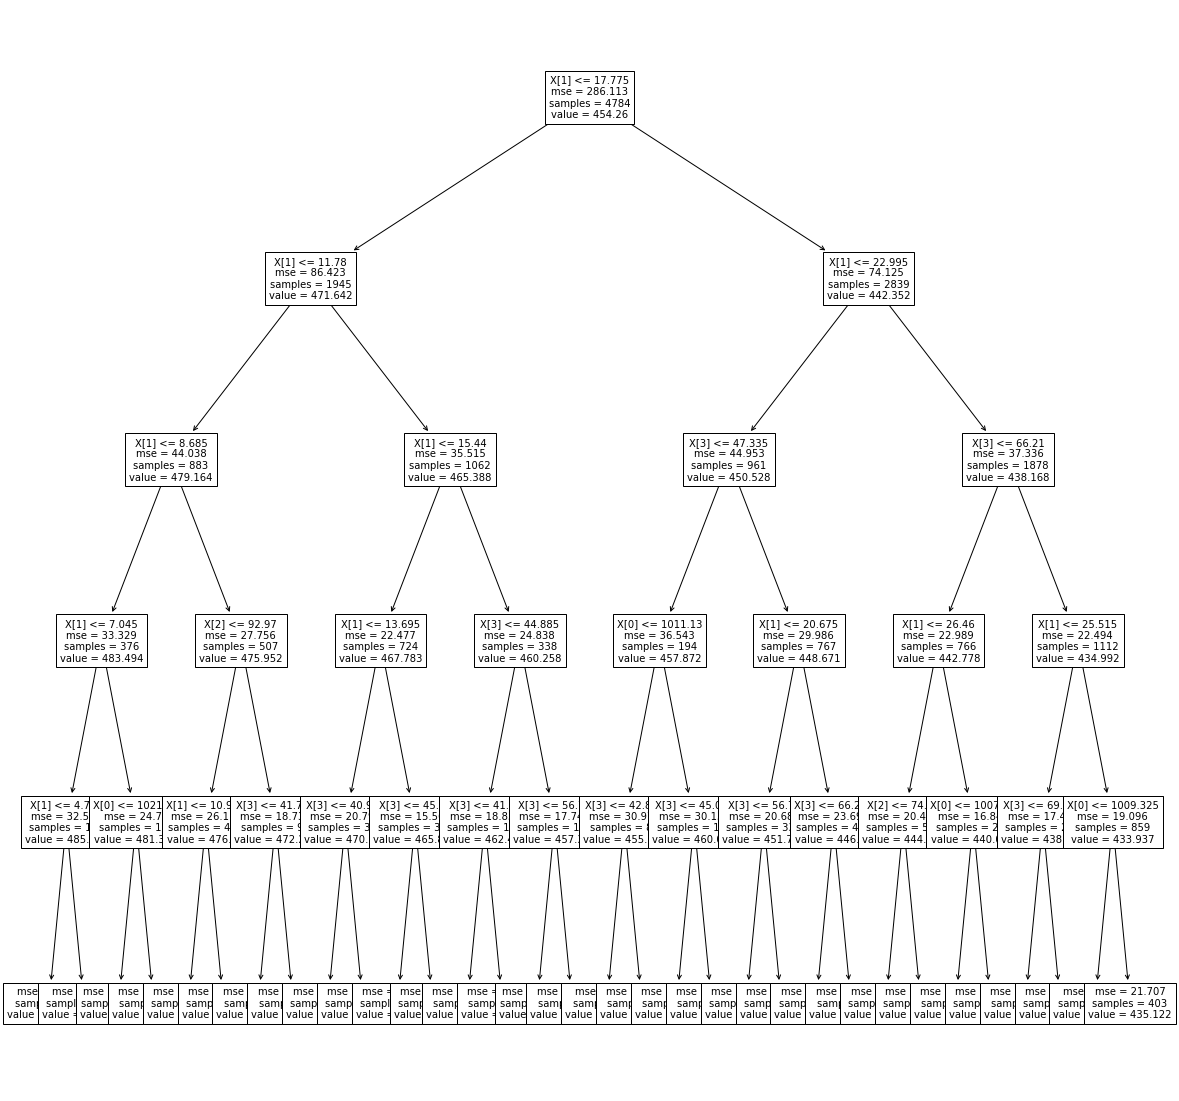

In [39]:
fig, ax = plt.subplots(figsize=(20,20))
plot_tree(dt_tuned, ax=ax, fontsize=10);

In [38]:
dt_tuned.feature_importances_

array([0.00284241, 0.95512547, 0.00201764, 0.04001449])

### 7) Assuming you want a generalizable model that will perform well on future, unseen data, which model has better performance?  

Assign `ans7` to either `"dt"` or `"dt_tuned"` to represent which model is best.

In [20]:
# CodeGrade step7
ans7 = 'dt_tuned'

In [21]:
assert type(ans7) == str
assert ans7 in ['dt', 'dt_tuned']